# Borders and Corners detection

## Gradient

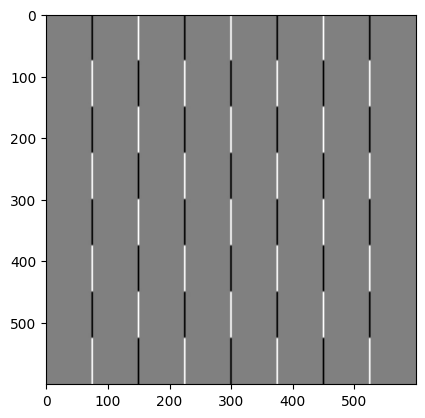

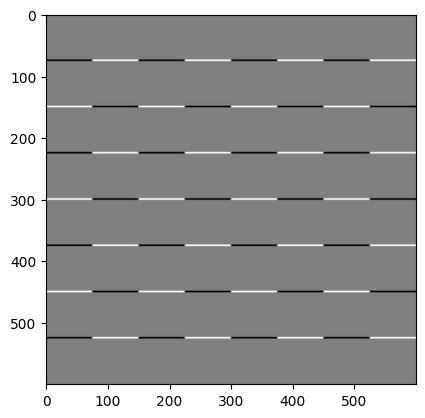

In [9]:
import cv2
import matplotlib.pyplot as plt

img_path = "img/board.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

# VERTICAL LINES.
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap='gray')

plt.figure()

# HORIZONTAL LINES.
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap='gray')

laplacian = cv2.Laplacian(img, cv2.CV_64F)


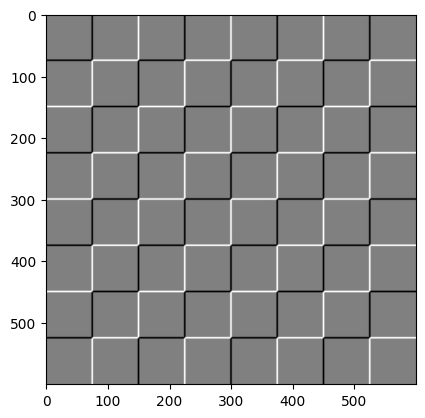

In [13]:
blend_img = cv2.addWeighted(src1=sobelx, src2=sobely, alpha=1, beta=1, gamma=0)
plt.imshow(blend_img, cmap='gray')

## Laplacian

https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6

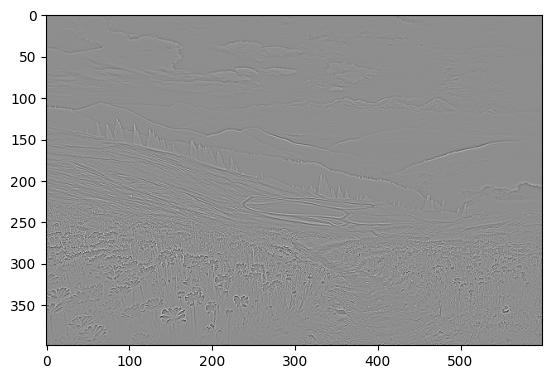

In [2]:
import cv2
import matplotlib.pyplot as plt

img_path = "img/nature.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.GaussianBlur(img, (5,5), 10)

plt.imshow(img, cmap='gray')

laplacian = cv2.Laplacian(img, cv2.CV_64F) 
plt.imshow(laplacian, cmap='gray')


## Corner Harris

In [1]:
import numpy as np
import cv2

filename = "img/board.jpg"
# filename = 'img/door.jpg'
# filename = 'img/door_house.jpg'

img = cv2.imread(filename)

# Uncomment if required.
# img = cv2.resize(img, (int(img.shape[0] / 2), int(img.shape[1] / 2)))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
 
dst = cv2.dilate(dst,None)

# print(np.unique(dst))
print(dst.min())
print(dst.max())
 
img[ dst > 0.01 * dst.max() ] = [0, 0, 255]
 
while True:
    cv2.imshow('dst', img)
    if cv2.waitKey(0) == ord('q'):
        break

cv2.destroyAllWindows()

-42282504.0
330747000.0


In [ ]:
import numpy as np
import cv2

# Abre el video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convierte el cuadro a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Aplica la detección de esquinas de Harris
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Dila las esquinas detectadas para mejor visualización
    dst = cv2.dilate(dst, None)

    # Marca las esquinas en la imagen original
    frame[dst > 0.01 * dst.max()] = [0, 0, 255]

    # Muestra el cuadro con las esquinas detectadas
    cv2.imshow('Corners', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Canny Edge Detection

In [ ]:
import numpy as np
import cv2

thresh_low = 0
thresh_upp = 255

# Abre el video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convierte el cuadro a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.5)

    edged_frame = cv2.Canny(blurred, 0, 255)

    cv2.imshow('Corners', edged_frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
